In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('netflix_titles.csv', lineterminator = '\n')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df['country']

0       United States
1        South Africa
2                 NaN
3                 NaN
4               India
            ...      
8802    United States
8803              NaN
8804    United States
8805    United States
8806            India
Name: country, Length: 8807, dtype: object

In [7]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Length: 8807, dtype: bool

In [9]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [16]:
import pandas as pd
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

# Initialize Plotly for Jupyter
init_notebook_mode(connected=True)

# Load dataset
df = pd.read_csv('netflix_titles.csv')

# ✅ Clean and convert date column
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')

# ✅ Extract year and month
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# ✅ Extract season count and duration
df['season_count'] = df.apply(lambda x: x['duration'].split(" ")[0] if isinstance(x['duration'], str) and "Season" in x['duration'] else "", axis=1)
df['duration'] = df.apply(lambda x: x['duration'].split(" ")[0] if isinstance(x['duration'], str) and "Season" not in x['duration'] else "", axis=1)

# Preview
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season_count
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,1
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,1
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,2


In [21]:
print(df.columns)


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added', 'season_count'],
      dtype='object')


In [22]:
df = pd.read_csv('netflix_titles.csv')  # reload just to be sure
print(df['type'].unique())              # confirm the column and values exist


['Movie' 'TV Show']


In [24]:
print(df.columns.tolist())


['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [25]:
['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

In [26]:
df = pd.read_csv("netflix_titles.csv")
print(df.columns.tolist())


['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [27]:
df.columns = df.columns.str.strip()  # removes leading/trailing whitespace


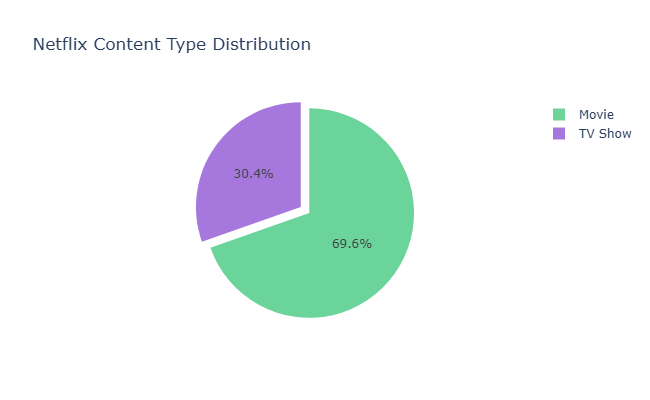

In [28]:
col = "type"

# Group the data safely
grouped = df[col].value_counts().reset_index()
grouped.columns = [col, 'count']

# Plot
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

trace = go.Pie(
    labels=grouped[col],
    values=grouped['count'],
    pull=[0.05] * len(grouped),  # optional: pull all slices slightly
    marker=dict(colors=["#6ad49b", "#a678de", "#ffb347", "#e67e22"])
)

layout = go.Layout(
    title="Netflix Content Type Distribution",
    height=400
)

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)


In [30]:
# Convert to datetime safely
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')

# Now extract year and month
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month


In [31]:
print(df.columns)


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added'],
      dtype='object')


In [34]:
# Ensure all entries are strings before stripping whitespace
df['date_added'] = pd.to_datetime(df['date_added'].astype(str).str.strip(), errors='coerce')

# Extract year
df['year_added'] = df['date_added'].dt.year


In [41]:
print(vc1.dtypes)
print(vc1.head())


count    float64
count      int64
dtype: object
    count  count
0  2019.0   1424
1  2020.0   1284
2  2018.0   1237
3  2021.0    993
4  2017.0    839


In [46]:
print(vc1.dtypes)
print(vc1.head())


count    float64
count      int64
dtype: object
   count  count
0    7.0    565
1    4.0    550
2   12.0    547
3    1.0    546
4   10.0    545


In [49]:
vc1 = d1[col].value_counts().reset_index()
vc1.columns = [col, 'count']

# Ensure count is numeric
vc1['count'] = pd.to_numeric(vc1['count'], errors='coerce')
vc1 = vc1.dropna(subset=['count'])

vc1['percent'] = (vc1['count'] / vc1['count'].sum()) * 100


In [50]:
print(vc1.head())


   month_added  count   percent
0          7.0    565  9.215462
1          4.0    550  8.970804
2         12.0    547  8.921872
3          1.0    546  8.905562
4         10.0    545  8.889251


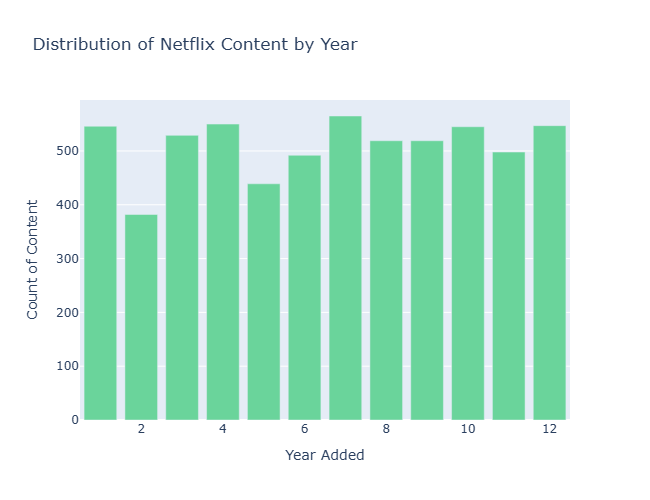

In [51]:
import plotly.graph_objects as go

# Plotting the bar chart
trace1 = go.Bar(
    x=vc1[col],  # x-axis (year or other category)
    y=vc1['count'],  # y-axis (count of each year/type)
    name="TV Shows",  # or name as per your dataset
    marker=dict(color="#6ad49b")  # Custom color
)

# Layout of the graph
layout = go.Layout(
    title="Distribution of Netflix Content by Year",  # Adjust title as per your dataset
    xaxis=dict(title="Year Added"),  # x-axis title
    yaxis=dict(title="Count of Content"),  # y-axis title
    height=500,  # Adjust height of the chart
    legend=dict(x=0.1, y=1.1)  # Optional legend placement
)

# Combine the trace and layout into a figure and plot
fig = go.Figure(data=[trace1], layout=layout)
fig.show()  # Display the graph


In [52]:
small = df.sort_values("release_year", ascending = True)
small = small[small['duration'] != ""]
small[['title', "release_year"]][:15]

,title,release_year
4250,Pioneers: First Women Filmmakers*,1925
7790,Prelude to War,1942
8205,The Battle of Midway,1942
8763,WWII: Report from the Aleutians,1943
8739,Why We Fight: The Battle of Russia,1943
8660,Undercover: How to Operate Behind Enemy Lines,1943
8436,The Negro Soldier,1944
8419,The Memphis Belle: A Story of a\nFlying Fortress,1944
8640,Tunisian Victory,1944
7575,Nazi Concentration Camps,1945


In [54]:
# Create 'season_count' column for TV Shows
df['season_count'] = df['duration'].apply(lambda x: x.split()[0] if pd.notna(x) and 'Season' in x else "")


In [55]:
# Create a cleaned 'duration' column for Movies (in minutes)
df['duration'] = df['duration'].apply(lambda x: x.split()[0] if pd.notna(x) and 'Season' not in x else "")


In [56]:
# Filter shows with non-empty season_count
tv_shows = df[df['season_count'] != ""]

# Convert season_count to numeric for sorting if needed
tv_shows['season_count'] = pd.to_numeric(tv_shows['season_count'], errors='coerce')

# Sort by release year
tv_shows_sorted = tv_shows.sort_values("release_year", ascending=True)

# Display first 15 entries
tv_shows_sorted[['title', 'release_year', 'season_count']].head(15)


C:\Users\chitr\AppData\Local\Temp\ipykernel_14880\3636757609.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,title,release_year,season_count
4250,Pioneers: First Women Filmmakers*,1925,1
1331,Five Came Back: The Reference Films,1945,1
7743,Pioneers of African-American Cinema,1946,1
8541,The Twilight Zone (Original Series),1963,4
8189,The Andy Griffith Show,1967,8
4550,Monty Python's Fliegender Zirkus,1972,1
4551,Monty Python's Flying Circus,1974,4
6549,Dad's Army,1977,10
6674,El Chavo,1979,1
7588,Ninja Hattori,1981,1


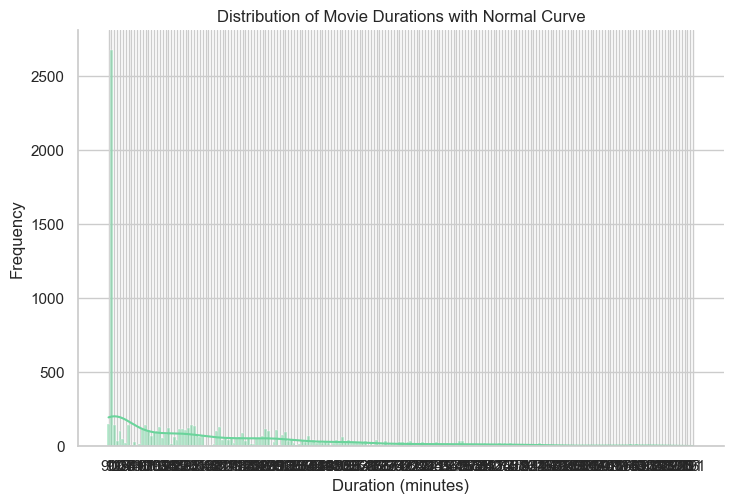

In [58]:
# Plot the distribution with KDE (normal curve)
sns.set(style="whitegrid")
sns.displot(df['duration'].dropna(), kde=True, bins=30, color="#6ad49b", height=5, aspect=1.5)

# Add titles and labels
plt.title("Distribution of Movie Durations with Normal Curve")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")

# Show the plot
plt.show()


In [60]:
import pandas as pd

# Assuming df is already loaded with Netflix data

# Step 1: Extract number of seasons for TV Shows only
df['season_count'] = df.apply(
    lambda x: x['duration'].split()[0] if x['type'] == 'TV Show' and pd.notna(x['duration']) and 'Season' in x['duration']
    else None,
    axis=1
)

# Step 2: Convert to numeric (some might be strings)
df['season_count'] = pd.to_numeric(df['season_count'], errors='coerce')

# Step 3: Filter TV Shows and drop NaN
tv_shows = df[df['type'] == 'TV Show']
tv_shows = tv_shows.dropna(subset=['season_count'])

# Step 4: Sort by season count descending
top_tv_shows = tv_shows.sort_values(by='season_count', ascending=False)

# Step 5: Display top shows with most seasons
top_tv_shows[['title', 'season_count', 'release_year']].head(15)


,title,season_count,release_year


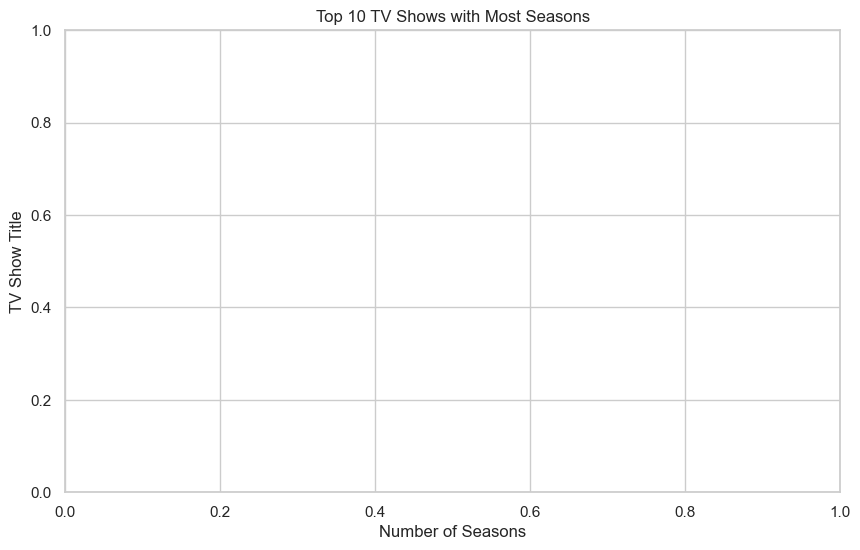

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Take top 10 for plotting
plot_data = top_tv_shows[['title', 'season_count']].head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=plot_data, x='season_count', y='title', palette='viridis')
plt.title('Top 10 TV Shows with Most Seasons')
plt.xlabel('Number of Seasons')
plt.ylabel('TV Show Title')
plt.show()


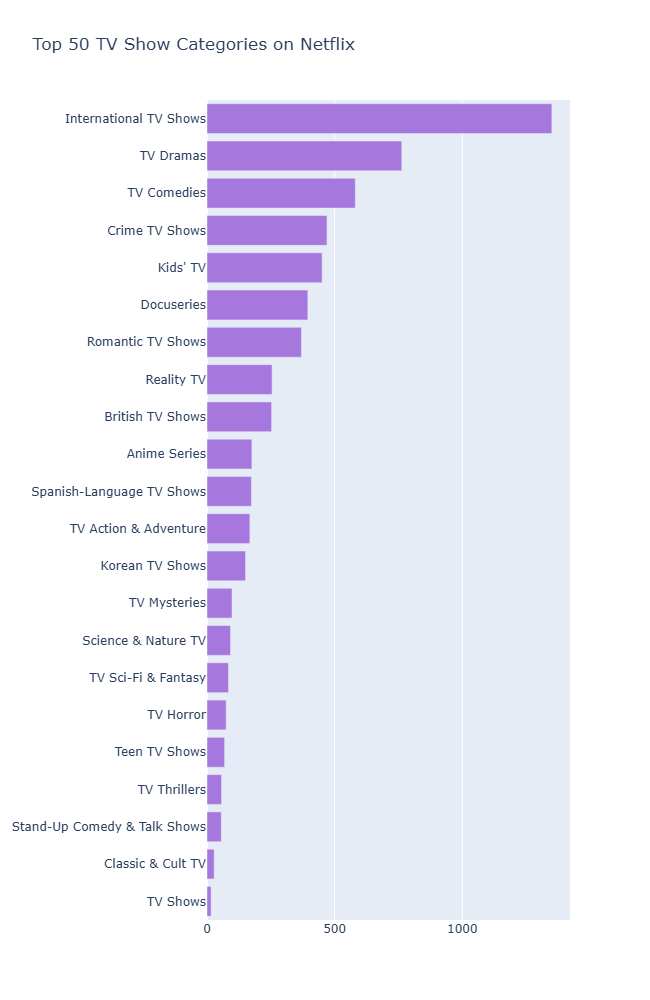

In [62]:
from collections import Counter
import plotly.graph_objects as go

# Ensure d2 contains only TV Shows
d2 = df[df['type'] == 'TV Show']

# Extract and count categories
categories = ", ".join(d2['listed_in'].dropna()).split(", ")
counter_list = Counter(categories).most_common(50)

# Reverse for horizontal plot (largest on top)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]

# Create horizontal bar chart
trace1 = go.Bar(
    y=labels,
    x=values,
    orientation="h",
    name="TV Shows",
    marker=dict(color="#a678de")
)

# Layout and figure
layout = go.Layout(
    title="Top 50 TV Show Categories on Netflix",
    height=1000,
    legend=dict(x=0.1, y=1.1, orientation="h")
)

fig = go.Figure(data=[trace1], layout=layout)
fig.show()


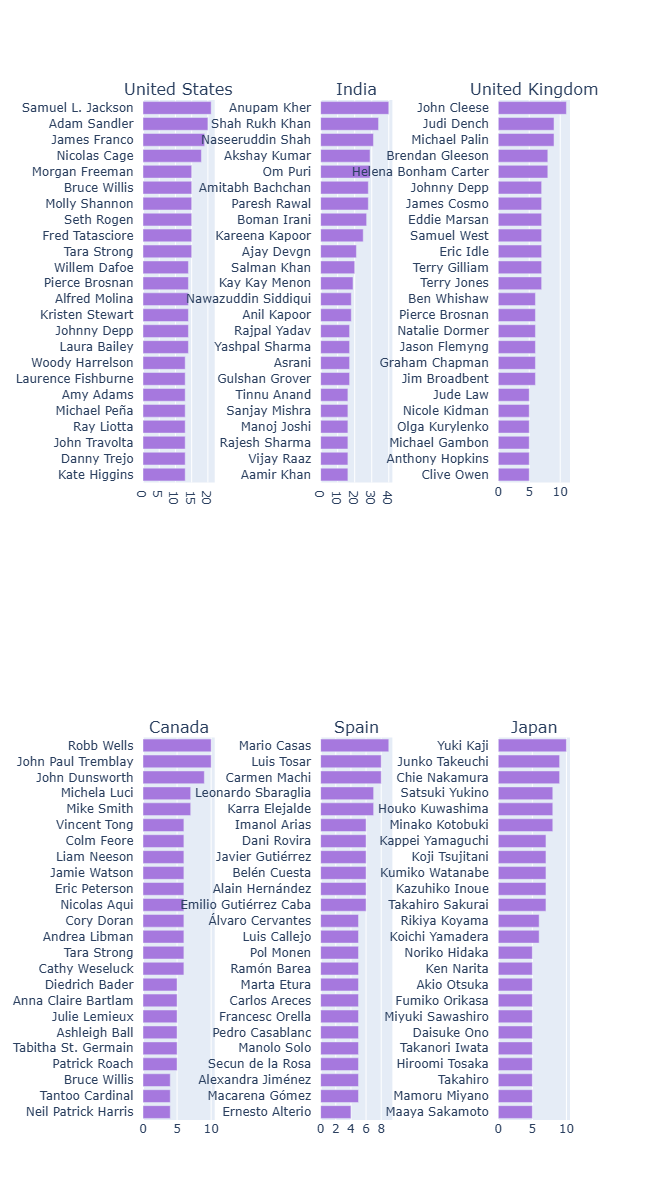

9

In [63]:
def country_trace(country, flag = "movie"):
    df["from_us"] = df['country'].fillna("").apply(lambda x : 1 if country.lower() in x.lower() else 0)
    small = df[df["from_us"] == 1]
    if flag == "movie":
        small = small[small["duration"] != ""]
    else:
        small = small[small["season_count"] != ""]
    cast = ", ".join(small['cast'].fillna("")).split(", ")
    tags = Counter(cast).most_common(25)
    tags = [_ for _ in tags if "" != _[0]]

    labels, values = [_[0]+"  " for _ in tags], [_[1] for _ in tags]
    trace = go.Bar(y=labels[::-1], x=values[::-1], orientation="h", name="", marker=dict(color="#a678de"))
    return trace

from plotly.subplots import make_subplots
traces = []
titles = ["United States", "","India","", "United Kingdom", "Canada","", "Spain","", "Japan"]
for title in titles:
    if title != "":
        traces.append(country_trace(title))

fig = make_subplots(rows=2, cols=5, subplot_titles=titles)
fig.add_trace(traces[0], 1,1)
fig.add_trace(traces[1], 1,3)
fig.add_trace(traces[2], 1,5)
fig.add_trace(traces[3], 2,1)
fig.add_trace(traces[4], 2,3)
fig.add_trace(traces[5], 2,5)

fig.update_layout(height=1200, showlegend=False)
fig.show()
9

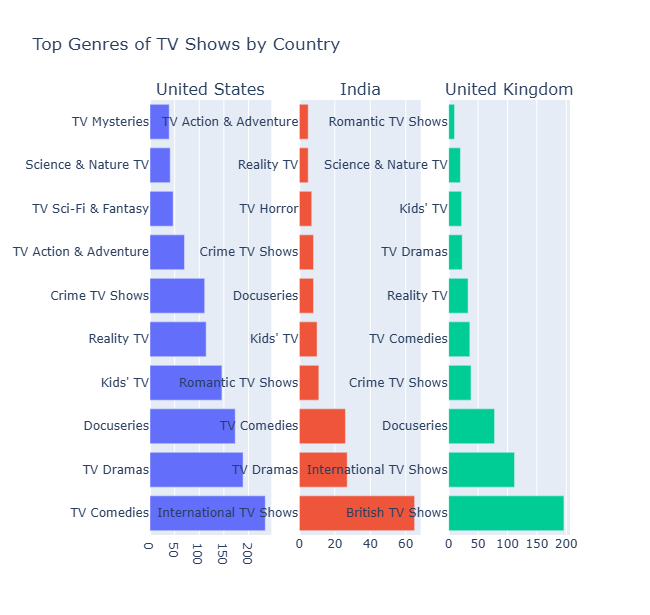

In [64]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Dummy country_trace function (replace with your own logic)
def country_trace(country_name, flag="tv_shows"):
    data = df[(df["type"] == "TV Show") & (df["country"] == country_name)]
    vc = data['listed_in'].str.split(', ').explode().value_counts().head(10)
    return go.Bar(x=vc.values, y=vc.index, orientation='h', name=country_name)

# Country titles
titles = ["United States", "India", "United Kingdom"]

# Create subplots
fig = make_subplots(rows=1, cols=3, subplot_titles=titles)

# Add each trace
for i, title in enumerate(titles):
    trace = country_trace(title)
    fig.add_trace(trace, row=1, col=i+1)

# Layout settings
fig.update_layout(
    height=600,
    width=1000,
    showlegend=False,
    title_text="Top Genres of TV Shows by Country"
)

fig.show()


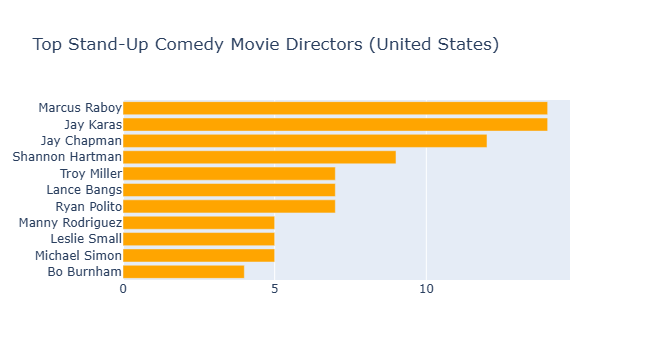

In [65]:
from collections import Counter
import plotly.graph_objects as go

# Filter: US Movies that belong to Stand-Up Comedy
small = df[
    (df["type"] == "Movie") &
    (df["country"] == "United States") &
    (df["listed_in"].str.contains("Stand-Up", na=False))
]

# Count top directors
col = "director"
categories = ", ".join(small[col].fillna("")).split(", ")
counter_list = Counter(categories).most_common(12)
counter_list = [_ for _ in counter_list if _[0] != ""]

# Prepare data for plot
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]

# Create bar chart
trace1 = go.Bar(
    y=labels,
    x=values,
    orientation="h",
    name="Stand-Up Comedy",
    marker=dict(color="orange")
)

layout = go.Layout(
    title="Top Stand-Up Comedy Movie Directors (United States)",
    legend=dict(x=0.1, y=1.1, orientation="h")
)

fig = go.Figure(data=[trace1], layout=layout)
fig.show()


In [66]:
tag = "jay karas"

# Create a new column 'relevant' = 1 if 'jay karas' is in the 'director' column
df["relevant"] = df['director'].fillna("").apply(lambda x : 1 if tag in x.lower() else 0)

# Filter rows where 'relevant' == 1
small = df[df["relevant"] == 1]

# Display selected columns
small[['title', 'release_year', 'listed_in']]


,title,release_year,listed_in
2695,The Main Event,2020,"Children & Family Movies, Comedies, Sports Movies"
3646,Demetri Martin: The Overthinker,2018,Stand-Up Comedy
3733,Adam Devine: Best Time of Our Lives,2019,Stand-Up Comedy
4803,Bill Burr: You People Are All the Same,2012,Stand-Up Comedy
4863,Ali Wong: Hard Knock Wife,2018,Stand-Up Comedy
5086,Tom Segura: Disgraceful,2018,Stand-Up Comedy
5230,Christina P: Mother Inferior,2017,Stand-Up Comedy
5622,Bill Burr: Walk Your Way Out,2017,Stand-Up Comedy
5808,Jeff Foxworthy and Larry the Cable Guy: We’ve ...,2016,Stand-Up Comedy
5817,Jim Gaffigan: Mr. Universe,2012,Stand-Up Comedy


<Axes: title={'center': 'Jay Karas Titles by Year'}, xlabel='release_year'>

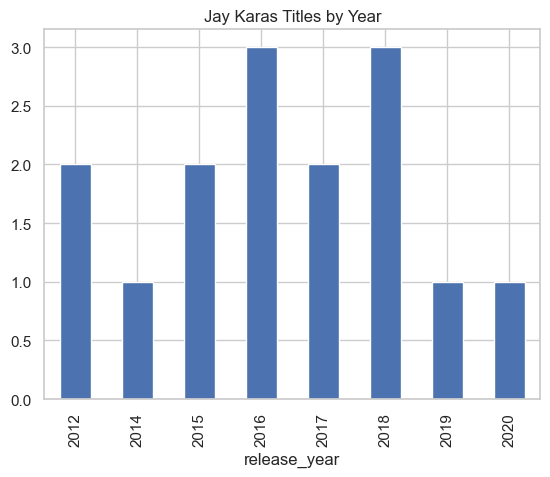

In [67]:
small['release_year'].value_counts().sort_index().plot(kind='bar', title='Jay Karas Titles by Year')


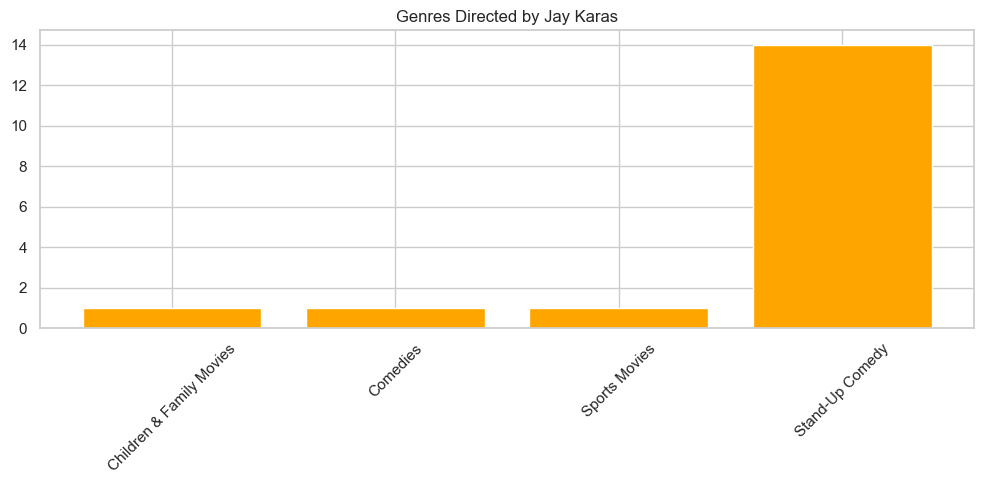

In [68]:
from collections import Counter
import matplotlib.pyplot as plt

genres = ", ".join(small['listed_in'].dropna()).split(", ")
genre_count = Counter(genres)

plt.figure(figsize=(10,5))
plt.bar(genre_count.keys(), genre_count.values(), color='orange')
plt.title("Genres Directed by Jay Karas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [69]:
tag = "Stand-Up Comedy"
df["relevant"] = df['listed_in'].fillna("").apply(lambda x : 1 if tag.lower() in x.lower() else 0)
small = df[df["relevant"] == 1]
small[small["country"] == "United States"][["title", "country","release_year"]].head(10)

,title,country,release_year
359,The Original Kings of Comedy,United States,2000
511,Chelsea,United States,2017
826,Bo Burnham: Inside,United States,2021
1189,Nate Bargatze: The Greatest Average American,United States,2021
1191,The Fluffy Movie,United States,2014
1278,Brian Regan: On the Rocks,United States,2021
1352,Tiffany Haddish Presents: They Ready,United States,2021
1450,Eddie Murphy: Raw,United States,1987
1502,London Hughes: To Catch a D*ck,United States,2020
1530,Schulz Saves America,United States,2020


In [70]:
tag = "Stand-Up Comedy"
df["relevant"] = df['listed_in'].fillna("").apply(lambda x : 1 if tag.lower() in x.lower() else 0)
small = df[df["relevant"] == 1]
small[small["country"] == "India"][["title", "country","release_year"]].head(10)

,title,country,release_year
1542,Vir Das: Outside In - The Lockdown Special,India,2020
2458,Kenny Sebastian: The Most Interesting Person i...,India,2020
2644,"Yours Sincerely, Kanan Gill",India,2020
2765,Ladies Up,India,2019
2869,Amit Tandon: Family Tandoncies,India,2019
2987,Vir Das: For India,India,2020
5371,Aditi Mittal: Things They Wouldn't Let Me Say,India,2017
6825,Gangs of Hassepur,India,2014
7453,Midnight Misadventures With Mallika Dua,India,2018
